In [64]:
import pandas as pd
df = pd.read_csv('/Users/nat/Documents/GitHub/Bone_Monitor/datasets/osteoporosis.csv')


In [65]:
binary_columns = []
categorical_columns = []

for column in df.columns:
    if column not in ['Id', 'Age']:
        unique_values = df[column].nunique(dropna=False)
        if unique_values == 2:
            binary_columns.append(column)
        elif unique_values > 2:
            categorical_columns.append(column)

In [66]:
from sklearn.preprocessing import LabelEncoder

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

df.head()

,Id,Age,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Alcohol Consumption,Medical Conditions,Medications,Prior Fractures,Osteoporosis
0,1734616,69,Female,Normal,Yes,1,Underweight,Low,Sufficient,Sedentary,Yes,Moderate,1,Corticosteroids,Yes,1
1,1419098,32,Female,Normal,Yes,1,Underweight,Low,Sufficient,Sedentary,No,NaN,2,NaN,Yes,1
2,1797916,89,Female,Postmenopausal,No,2,Normal,Adequate,Sufficient,Active,No,Moderate,0,Corticosteroids,No,1
3,1805337,78,Female,Normal,No,2,Underweight,Adequate,Insufficient,Sedentary,Yes,NaN,1,Corticosteroids,No,1
4,1351334,38,Male,Postmenopausal,Yes,0,Normal,Low,Sufficient,Active,Yes,NaN,1,NaN,Yes,1


In [67]:
from sklearn.preprocessing import LabelEncoder

for col in binary_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

print(binary_columns)

df.head()

['Gender', 'Hormonal Changes', 'Family History', 'Body Weight', 'Calcium Intake', 'Vitamin D Intake', 'Physical Activity', 'Smoking', 'Alcohol Consumption', 'Medications', 'Prior Fractures', 'Osteoporosis']


,Id,Age,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Alcohol Consumption,Medical Conditions,Medications,Prior Fractures,Osteoporosis
0,1734616,69,0,0,1,1,1,1,1,1,1,0,1,0,1,1
1,1419098,32,0,0,1,1,1,1,1,1,0,1,2,1,1,1
2,1797916,89,0,1,0,2,0,0,1,0,0,0,0,0,0,1
3,1805337,78,0,0,0,2,1,0,0,1,1,1,1,0,0,1
4,1351334,38,1,1,1,0,0,1,1,0,1,1,1,1,1,1


In [68]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier

X = df.drop(['Osteoporosis', 'Id'], axis=1) 
y = df['Osteoporosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gradient_boosting_model = GradientBoostingClassifier()

gradient_boosting_model.fit(X_train, y_train)

accuracy = gradient_boosting_model.score(X_test, y_test)
print(f"Gradient Boosting Classifier Accuracy: {accuracy * 100:.2f}%")


Gradient Boosting Classifier Accuracy: 90.82%


In [69]:
import os
import joblib
import pickle
directory = '/Users/nat/Documents/GitHub/Bone_Monitor/models'
if not os.path.exists(directory):
    os.makedirs(directory)  



model_filename = os.path.join(directory, 'predictor.pkl')

if hasattr(gradient_boosting_model, 'n_estimators_'):
    print("Model is fitted. Number of estimators:", gradient_boosting_model.n_estimators_)
    # Save the fitted model
    joblib.dump(gradient_boosting_model, model_filename)
else:
    print("Model fitting failed.")
print(f"Model saved to {model_filename}")

Model is fitted. Number of estimators: 100
Model saved to /Users/nat/Documents/GitHub/Bone_Monitor/models/predictor.pkl


In [53]:
df = pd.read_csv('/Users/nat/Documents/GitHub/Bone_Monitor/datasets/osteoporosis.csv')

categorical_columns = ['Gender', 'Hormonal Changes', 'Family History', 'Race/Ethnicity', 'Body Weight', 
                       'Calcium Intake', 'Vitamin D Intake', 'Physical Activity', 'Smoking', 'Alcohol Consumption', 
                       'Medical Conditions', 'Medications', 'Prior Fractures']

for col in categorical_columns:
    df[col] = df[col].astype(str)
print(df.dtypes)

Id                      int64
Age                     int64
Gender                 object
Hormonal Changes       object
Family History         object
Race/Ethnicity         object
Body Weight            object
Calcium Intake         object
Vitamin D Intake       object
Physical Activity      object
Smoking                object
Alcohol Consumption    object
Medical Conditions     object
Medications            object
Prior Fractures        object
Osteoporosis            int64
dtype: object


In [54]:
base_dir = '/Users/nat/Documents/GitHub/Bone_Monitor/models/encoders'
os.makedirs(base_dir, exist_ok=True)

encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le
    encoder_path = os.path.join(base_dir, f'{col}_encoder.pkl')
    joblib.dump(le, encoder_path)  # Save the encoder to disk
    print(f"{col} classes: {dict(zip(le.classes_, range(len(le.classes_))))}")


Gender classes: {'Female': 0, 'Male': 1}
Hormonal Changes classes: {'Normal': 0, 'Postmenopausal': 1}
Family History classes: {'No': 0, 'Yes': 1}
Race/Ethnicity classes: {'African American': 0, 'Asian': 1, 'Caucasian': 2}
Body Weight classes: {'Normal': 0, 'Underweight': 1}
Calcium Intake classes: {'Adequate': 0, 'Low': 1}
Vitamin D Intake classes: {'Insufficient': 0, 'Sufficient': 1}
Physical Activity classes: {'Active': 0, 'Sedentary': 1}
Smoking classes: {'No': 0, 'Yes': 1}
Alcohol Consumption classes: {'Moderate': 0, 'nan': 1}
Medical Conditions classes: {'Hyperthyroidism': 0, 'Rheumatoid Arthritis': 1, 'nan': 2}
Medications classes: {'Corticosteroids': 0, 'nan': 1}
Prior Fractures classes: {'No': 0, 'Yes': 1}


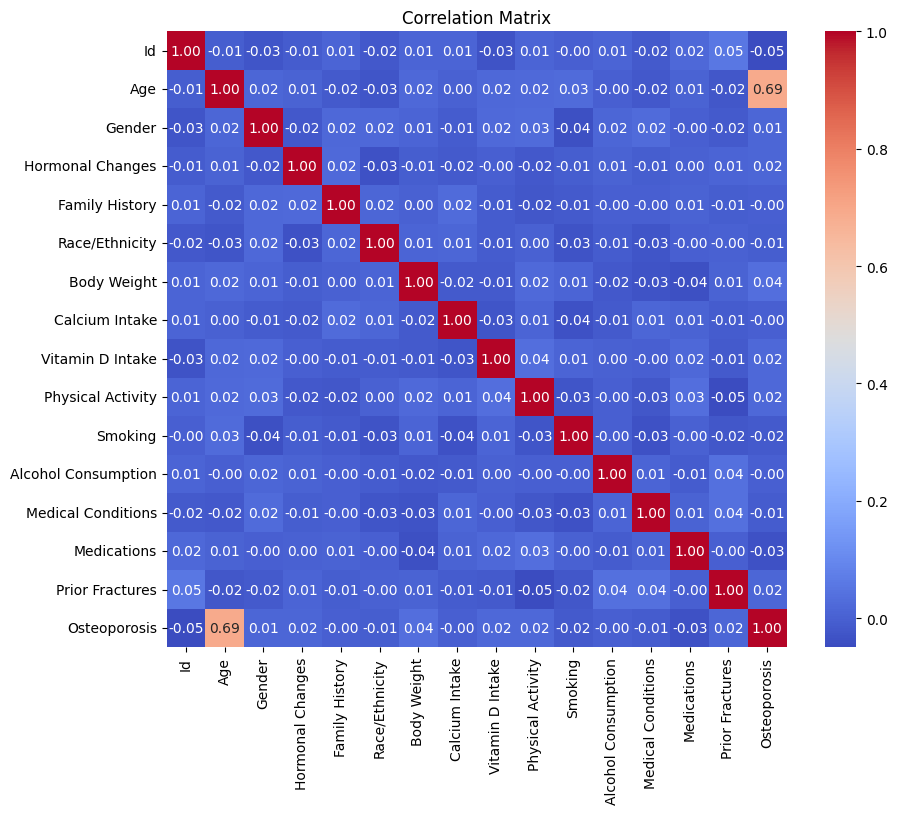

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and 'Osteoporosis' is your target column
correlation_matrix = df.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()